# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [1]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [2]:
df = pd.read_csv('cleaned_aviation_data.csv')
df.head()

C:\Users\strou\AppData\Local\Temp\ipykernel_2936\2419459606.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_aviation_data.csv')


,eventid,investigationtype,accidentnumber,event_date,location,country,injuryseverity,aircraftdamage,registrationnumber,make,...,weathercondition,broadphaseofflight,reportstatus,publicationdate,known_purpose,total_occupants,serious_or_fatal_injury_rate,any_serious_or_fatal_injury,destroyed,make_model
0,20001214X42095,Accident,SEA83LA036,1983-01-01,"NEWPORT, OR",United States,Non-Fatal,SUBSTANTIAL,N1296M,CESSNA,...,VMC,APPROACH,Probable Cause,NaN,1,4.0,0.0,0,0,CESSNA 182P
1,20001214X42067,Accident,MKC83LA056,1983-01-01,"WOODBINE, IA",United States,Non-Fatal,SUBSTANTIAL,N2639C,CESSNA,...,VMC,LANDING,Probable Cause,NaN,1,2.0,0.0,0,0,CESSNA 182RG
2,20001214X42063,Accident,MKC83LA050,1983-01-01,"MARYVILLE, MO",United States,Non-Fatal,SUBSTANTIAL,N58664,CESSNA,...,VMC,TAKEOFF,Probable Cause,NaN,1,1.0,0.0,0,0,CESSNA 182P
3,20001214X42018,Accident,LAX83FUG11,1983-01-01,"UPLAND, CA",United States,Non-Fatal,SUBSTANTIAL,N3084R,PIPER,...,VMC,APPROACH,Probable Cause,NaN,1,2.0,0.0,0,0,PIPER PA-28R-200
4,20001214X41951,Accident,CHI83LA074,1983-01-01,"SPRINGBROOK, WI",United States,Non-Fatal,SUBSTANTIAL,N89399,CESSNA,...,VMC,LANDING,Probable Cause,NaN,1,2.0,0.0,0,0,CESSNA 140


## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [3]:
# Aircraft size category based on 20-passenger threshold
df['aircraft_size'] = df['total_occupants'].apply(lambda x: 'Large' if x > 20 else 'Small')

# Preview the distribution
df['aircraft_size'].value_counts()

aircraft_size
Small    71213
Large     1252
Name: count, dtype: int64

#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

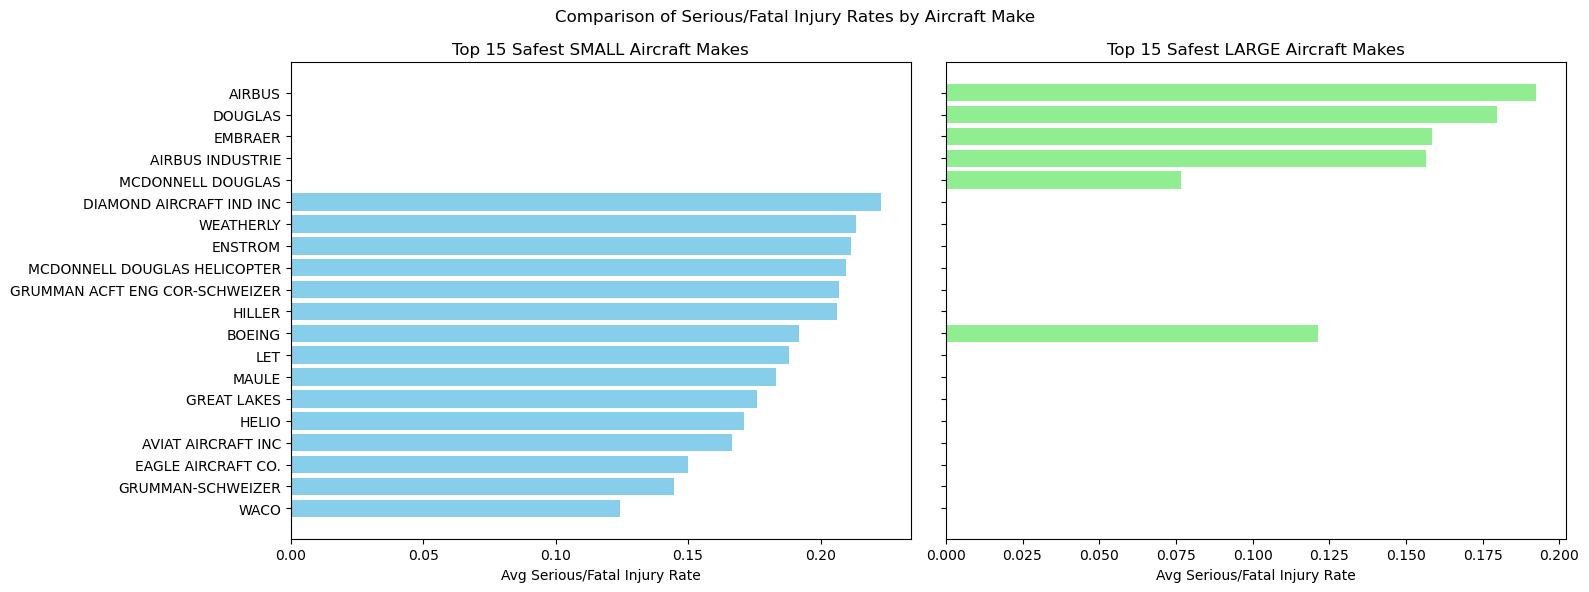

In [4]:
# Group by make and aircraft size to calculate mean injury rate
make_injury_summary = df.groupby(['make', 'aircraft_size']).agg({
    'serious_or_fatal_injury_rate': 'mean',
    'eventid': 'count'
}).rename(columns={
    'serious_or_fatal_injury_rate': 'avg_injury_rate',
    'eventid': 'incident_count'
}).reset_index()

# Only keep makes with enough incidents (e.g., 30 or more)
make_injury_summary = make_injury_summary[make_injury_summary['incident_count'] >= 30]

# Get top 15 safest small makes
top_small_makes = make_injury_summary[make_injury_summary['aircraft_size'] == 'Small'] \
    .nsmallest(15, 'avg_injury_rate')

# Get top 15 safest large makes
top_large_makes = make_injury_summary[make_injury_summary['aircraft_size'] == 'Large'] \
    .nsmallest(15, 'avg_injury_rate')
import matplotlib.pyplot as plt

# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Small aircraft plot
axes[0].barh(top_small_makes['make'], top_small_makes['avg_injury_rate'], color='skyblue')
axes[0].set_title('Top 15 Safest SMALL Aircraft Makes')
axes[0].invert_yaxis()
axes[0].set_xlabel('Avg Serious/Fatal Injury Rate')

# Large aircraft plot
axes[1].barh(top_large_makes['make'], top_large_makes['avg_injury_rate'], color='lightgreen')
axes[1].set_title('Top 15 Safest LARGE Aircraft Makes')
axes[1].invert_yaxis()
axes[1].set_xlabel('Avg Serious/Fatal Injury Rate')

plt.suptitle('Comparison of Serious/Fatal Injury Rates by Aircraft Make')
plt.tight_layout()
plt.show()


**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

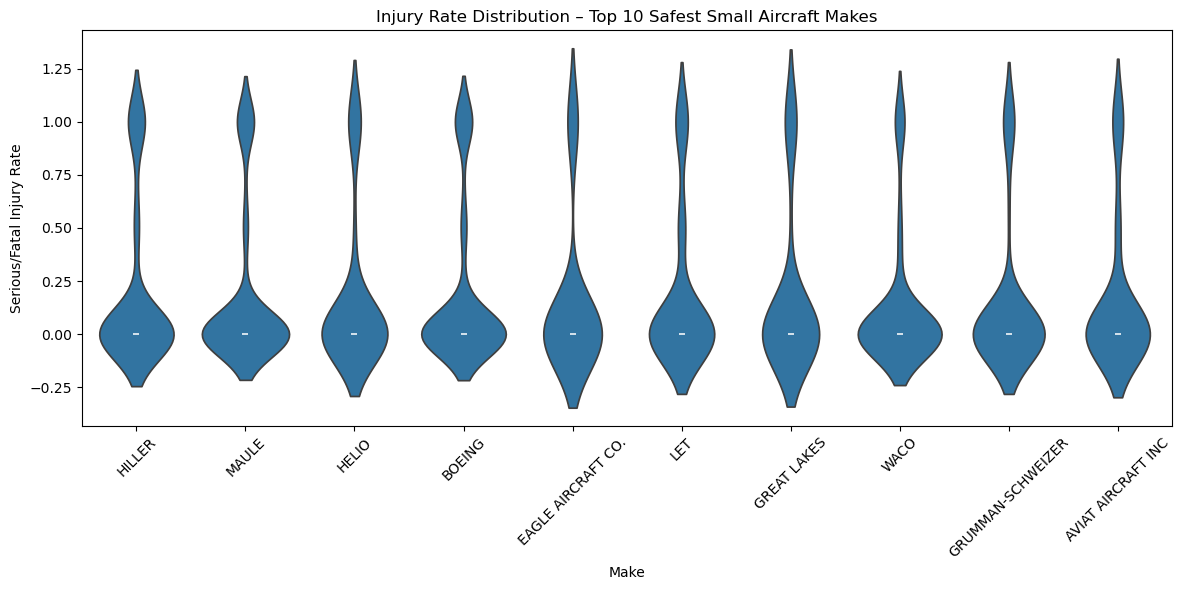

In [7]:
# Top 10 safest small aircraft makes
top_10_small_makes = make_injury_summary[
    make_injury_summary['aircraft_size'] == 'Small'
].nsmallest(10, 'avg_injury_rate')['make'].tolist()

# Filter the main DataFrame to those makes only
df_small_violin = df[
    (df['aircraft_size'] == 'Small') &
    (df['make'].isin(top_10_small_makes))
]

# Create violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_small_violin, x='make', y='serious_or_fatal_injury_rate')
plt.title('Injury Rate Distribution – Top 10 Safest Small Aircraft Makes')
plt.ylabel('Serious/Fatal Injury Rate')
plt.xlabel('Make')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

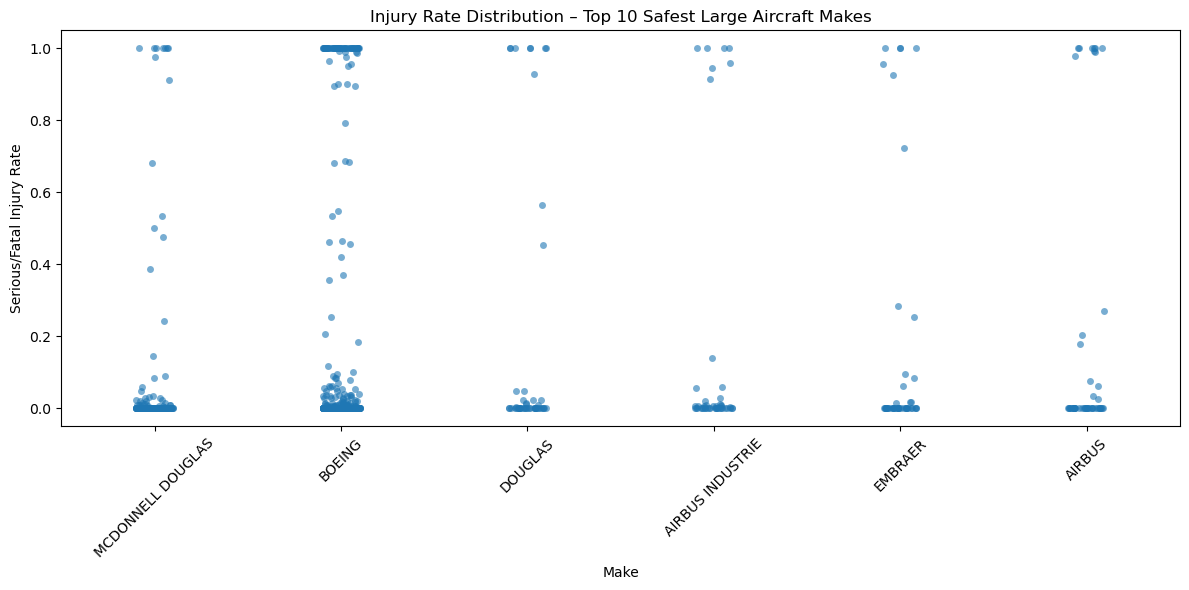

In [8]:
# Top 10 Largest aircraft makes
top_10_large_makes = make_injury_summary[
    make_injury_summary['aircraft_size'] == 'Large'
].nsmallest(10, 'avg_injury_rate')['make'].tolist()

# Filter the dataset
df_large_strip = df[
    (df['aircraft_size'] == 'Large') &
    (df['make'].isin(top_10_large_makes))
]

# Create Stripplot
plt.figure(figsize=(12, 6))
sns.stripplot(data=df_large_strip, x='make', y='serious_or_fatal_injury_rate', jitter=True, alpha=0.6)
plt.title('Injury Rate Distribution – Top 10 Safest Large Aircraft Makes')
plt.ylabel('Serious/Fatal Injury Rate')
plt.xlabel('Make')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

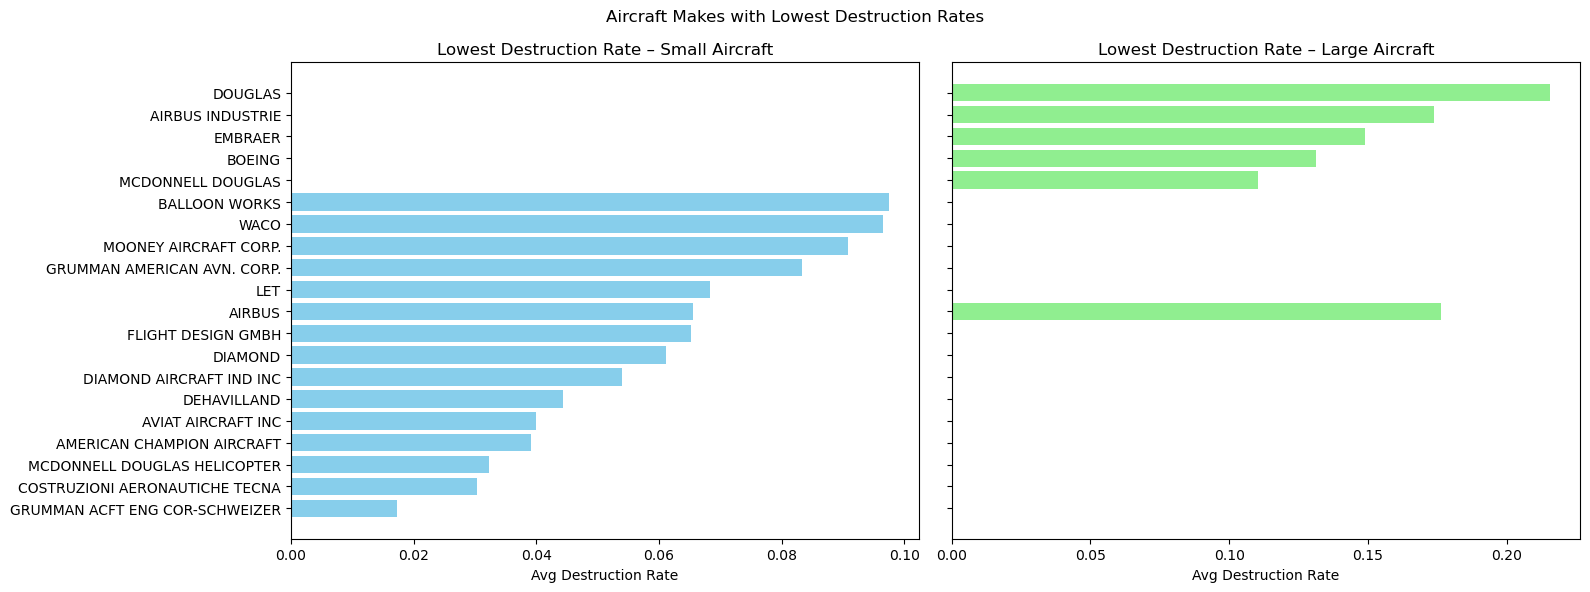

In [9]:
make_destruction_summary = df.groupby(['make', 'aircraft_size']).agg({
    'destroyed': 'mean',
    'eventid': 'count'
}).rename(columns={
    'destroyed': 'avg_destroyed_rate',
    'eventid': 'incident_count'
}).reset_index()

make_destruction_summary = make_destruction_summary[make_destruction_summary['incident_count'] >= 30]

# Small aircraft – lowest destruction rates
top_small_destruction = make_destruction_summary[make_destruction_summary['aircraft_size'] == 'Small'] \
    .nsmallest(15, 'avg_destroyed_rate')

# Large aircraft – lowest destruction rates
top_large_destruction = make_destruction_summary[make_destruction_summary['aircraft_size'] == 'Large'] \
    .nsmallest(15, 'avg_destroyed_rate')

# Chart 
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Small aircraft
axes[0].barh(top_small_destruction['make'], top_small_destruction['avg_destroyed_rate'], color='skyblue')
axes[0].set_title('Lowest Destruction Rate – Small Aircraft')
axes[0].invert_yaxis()
axes[0].set_xlabel('Avg Destruction Rate')

# Large aircraft
axes[1].barh(top_large_destruction['make'], top_large_destruction['avg_destroyed_rate'], color='lightgreen')
axes[1].set_title('Lowest Destruction Rate – Large Aircraft')
axes[1].invert_yaxis()
axes[1].set_xlabel('Avg Destruction Rate')

plt.suptitle('Aircraft Makes with Lowest Destruction Rates')
plt.tight_layout()
plt.show()



#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

Based on the analysis of aviation accident data from 1983-2023. Small aircraft recommendations are as follows. Grumman-Schweizer, Maule, and Waco. They had a low average injury rate and tight, consistent distributions in the violin plot. This suggests stable and repeatable safety performance. Large aircraft recommendations are. Airbus, Embraer, and Douglas. They had low destruction rates, tight clustering and near zero injury rates in the stripplots. This indicates consistent crash survivability. Safety metrics: Serious or Fatal Injury Rate: Proportion of passengers seriously or fatally injured per accident. Destruction Rate: Proportion of aircraft labeled as destroyed in an incident. Both metrics were normalized to ensure fair comparisons arcoss makes with a minimum of 30 accidents. 


### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

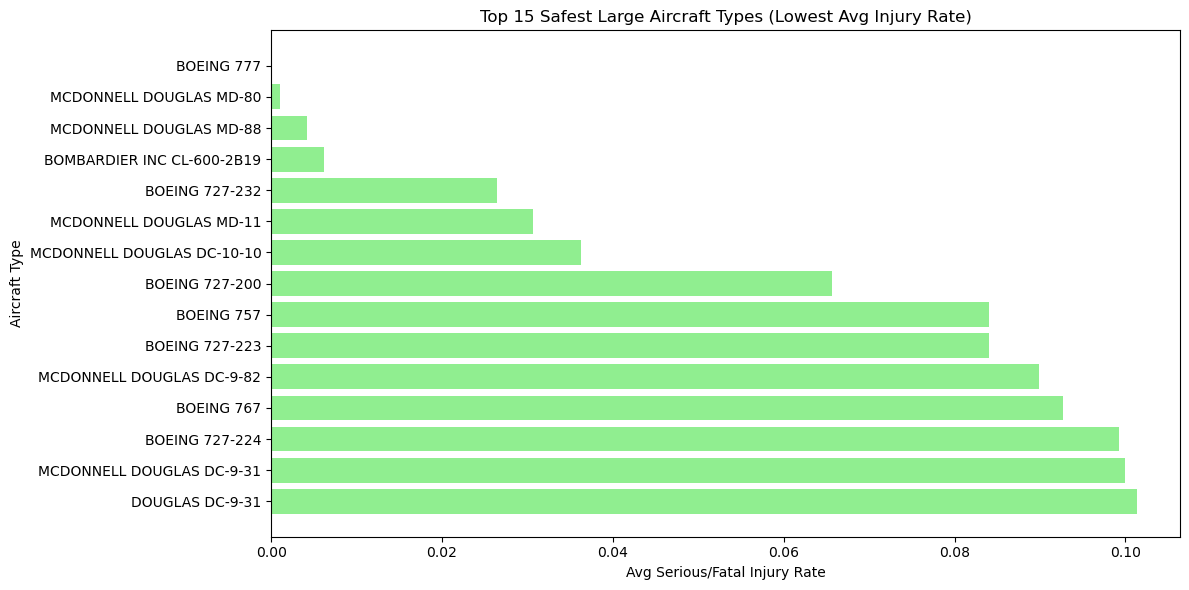

In [10]:
# large aircraft 
df_large = df[df['aircraft_size'] == 'Large']

# Group by aircraft type
large_model_summary = df_large.groupby('make_model').agg({
    'serious_or_fatal_injury_rate': 'mean',
    'eventid': 'count'
}).rename(columns={
    'serious_or_fatal_injury_rate': 'avg_injury_rate',
    'eventid': 'incident_count'
}).reset_index()

# Keep only types with at least 10 incidents
large_model_summary = large_model_summary[large_model_summary['incident_count'] >= 10]

# Sort to get top 15 safest aircraft types
top_large_models = large_model_summary.nsmallest(15, 'avg_injury_rate')

# Preview
top_large_models

plt.figure(figsize=(12, 6))
plt.barh(top_large_models['make_model'], top_large_models['avg_injury_rate'], color='lightgreen')
plt.title('Top 15 Safest Large Aircraft Types (Lowest Avg Injury Rate)')
plt.xlabel('Avg Serious/Fatal Injury Rate')
plt.ylabel('Aircraft Type')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

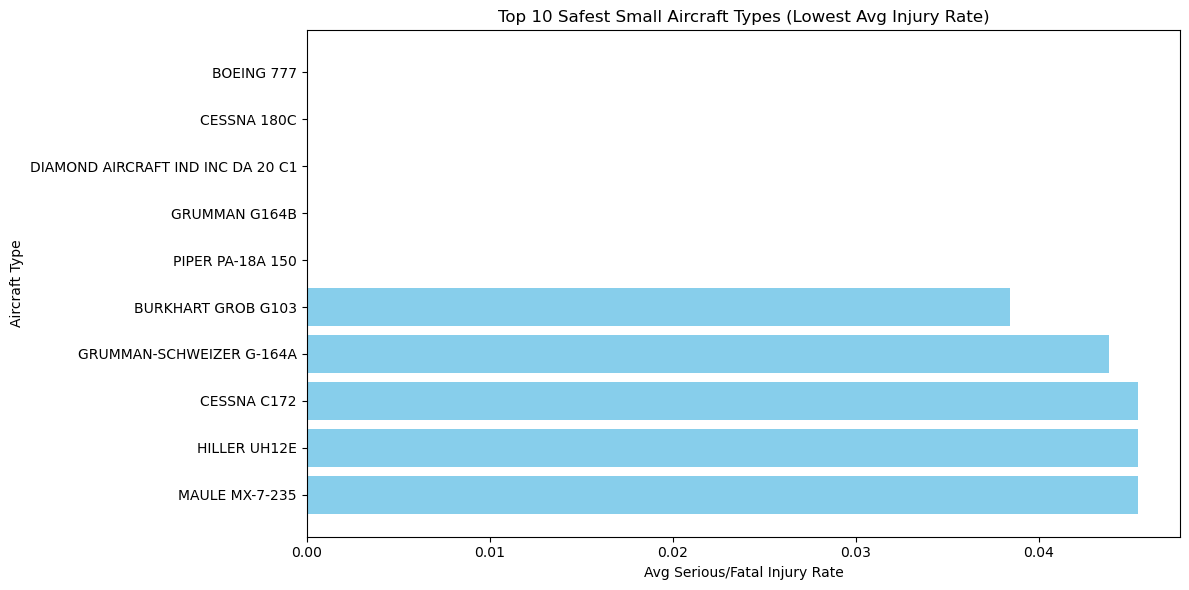

In [11]:
# Small aircraft only
df_small = df[df['aircraft_size'] == 'Small']

# Group by aircraft type
small_model_summary = df_small.groupby('make_model').agg({
    'serious_or_fatal_injury_rate': 'mean',
    'eventid': 'count'
}).rename(columns={
    'serious_or_fatal_injury_rate': 'avg_injury_rate',
    'eventid': 'incident_count'
}).reset_index()

# Keep only types with at least 10 incidents
small_model_summary = small_model_summary[small_model_summary['incident_count'] >= 10]

# Limit to the 10 safest small aircraft types
top_small_models = small_model_summary.nsmallest(10, 'avg_injury_rate')

plt.figure(figsize=(12, 6))
plt.barh(top_small_models['make_model'], top_small_models['avg_injury_rate'], color='skyblue')
plt.title('Top 10 Safest Small Aircraft Types (Lowest Avg Injury Rate)')
plt.xlabel('Avg Serious/Fatal Injury Rate')
plt.ylabel('Aircraft Type')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

This analysis evaluated specific aircraft types based on average rate of serious or fatal injuries per accident. They have been segmented by aircraft size. Among the top 10 see above. Most had low rates but met requireemnt of atleast 10 incidents. I think it is interesting that even among the safest there is possibly a benefit from widespread use which would mitigate injury severity. large aircraft benefit from advanced engineering, regulatory oversight, and controlled operational environments. For large aircraft: Top performing aircraft have rare but catastrophic incidents emphasising the importance of both average performance and consistency. 

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.

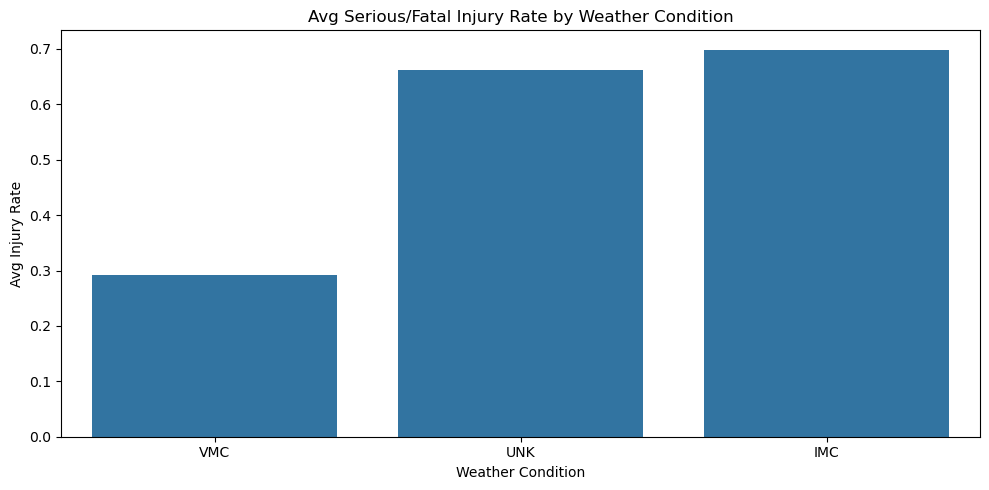

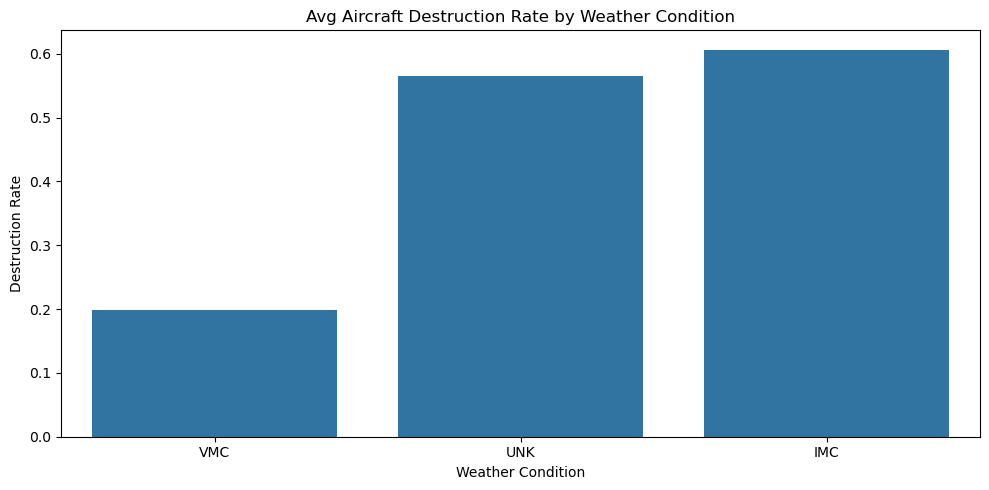

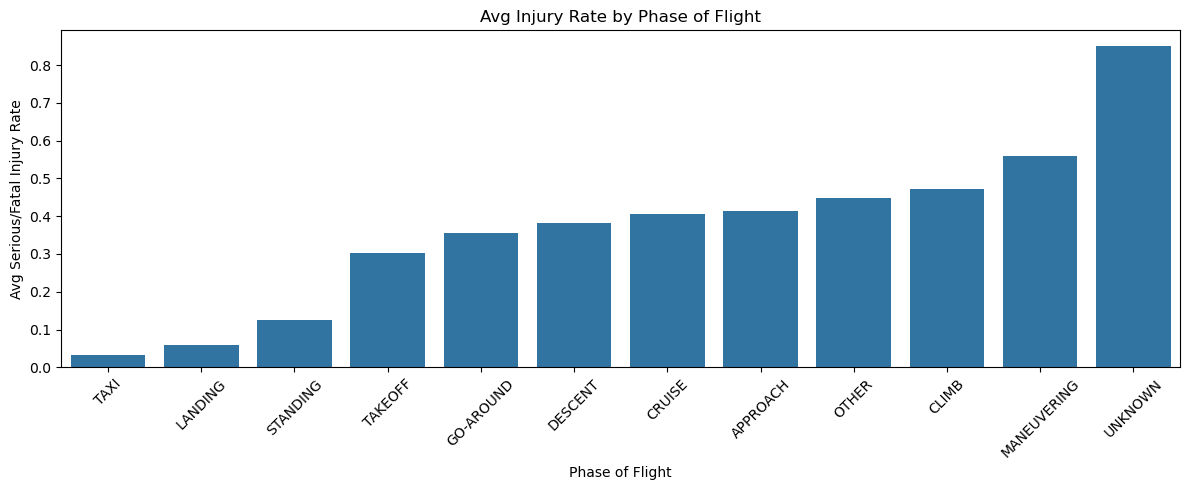

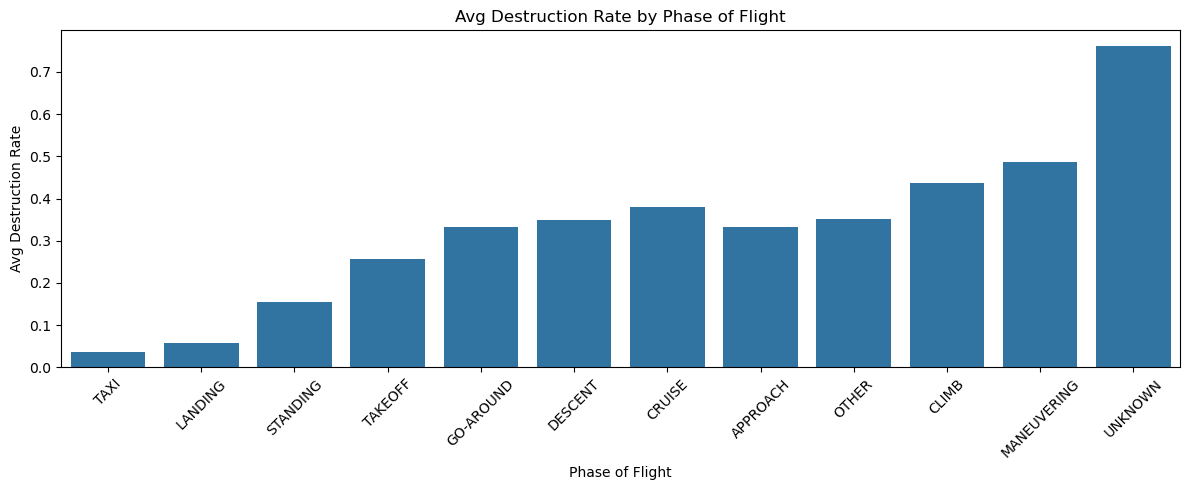

In [12]:
# Group by weather condition
weather_summary = df.groupby('weathercondition').agg({
    'serious_or_fatal_injury_rate': 'mean',
    'destroyed': 'mean',
    'eventid': 'count'
}).rename(columns={
    'serious_or_fatal_injury_rate': 'avg_injury_rate',
    'destroyed': 'avg_destruction_rate',
    'eventid': 'incident_count'
}).reset_index().sort_values(by='avg_injury_rate')

plt.figure(figsize=(10, 5))
sns.barplot(data=weather_summary, x='weathercondition', y='avg_injury_rate')
plt.title('Avg Serious/Fatal Injury Rate by Weather Condition')
plt.ylabel('Avg Injury Rate')
plt.xlabel('Weather Condition')
plt.tight_layout()
plt.show()

# Destruction
plt.figure(figsize=(10, 5))
sns.barplot(data=weather_summary, x='weathercondition', y='avg_destruction_rate')
plt.title('Avg Aircraft Destruction Rate by Weather Condition')
plt.ylabel('Destruction Rate')
plt.xlabel('Weather Condition')
plt.tight_layout()
plt.show()

# Phase of flight
phase_summary = df.groupby('broadphaseofflight').agg({
    'serious_or_fatal_injury_rate': 'mean',
    'destroyed': 'mean',
    'eventid': 'count'
}).rename(columns={
    'serious_or_fatal_injury_rate': 'avg_injury_rate',
    'destroyed': 'avg_destruction_rate',
    'eventid': 'incident_count'
}).reset_index().sort_values(by='avg_injury_rate')

plt.figure(figsize=(12, 5))
sns.barplot(data=phase_summary, x='broadphaseofflight', y='avg_injury_rate')
plt.title('Avg Injury Rate by Phase of Flight')
plt.ylabel('Avg Serious/Fatal Injury Rate')
plt.xlabel('Phase of Flight')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Destruction
plt.figure(figsize=(12, 5))
sns.barplot(data=phase_summary, x='broadphaseofflight', y='avg_destruction_rate')
plt.title('Avg Destruction Rate by Phase of Flight')
plt.ylabel('Avg Destruction Rate')
plt.xlabel('Phase of Flight')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

More accidents are likely to occur when pilots are flying by insturments. Injury and destruction rates are more severe than when pilots have visuals. The most dangerous phases are maneuving and cruising possibly due to high speeds, altitudes, and limited control options in emergencies. Go- arounds and approach phases exhibit elevated risk, potentially due to cognitive bias and operational pressure- sometimes referred to as 'get-there-itis' This mindset can affect pilot decision making, leading to a reduced likelihood of taking evasive or conservation action, especially when nearing the end of a flight and feeling committed to landing.